Prepare Problem
* Load libraries
* Load dataset


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv('house_price.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


## Summarize Data/ Exploratory Data Analysis
* Descriptive statistics
* Data visualizations


In [4]:
# Descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


#### Visualizations:

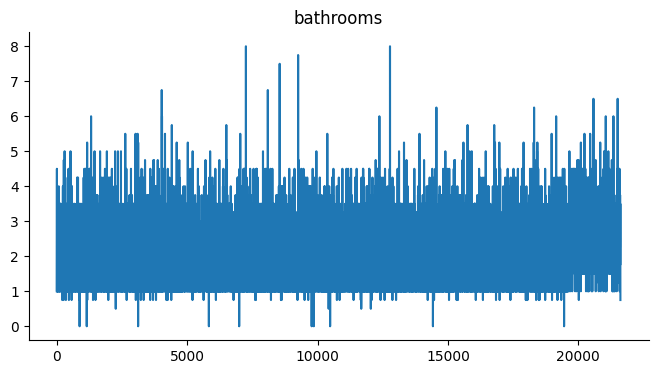

In [5]:
df['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

We can spot a clear outlier here

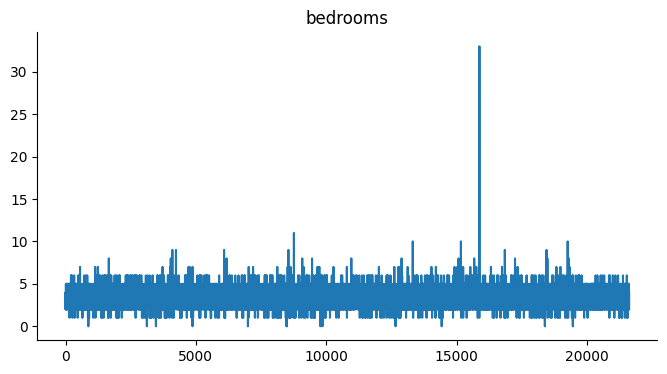

In [6]:
df['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

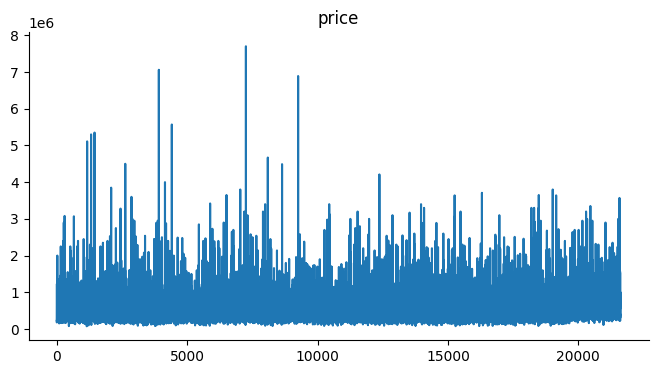

In [7]:
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

#### 2D Distributions

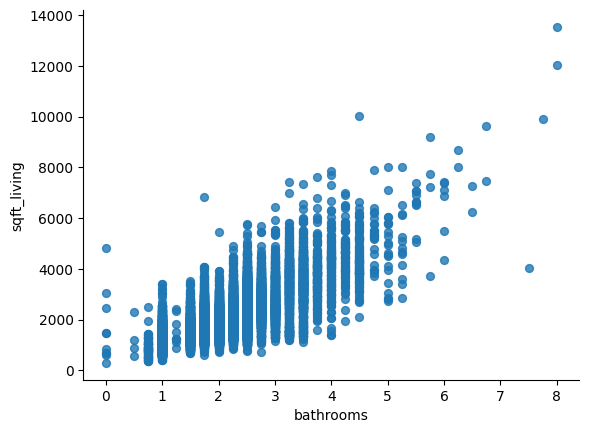

In [8]:
df.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

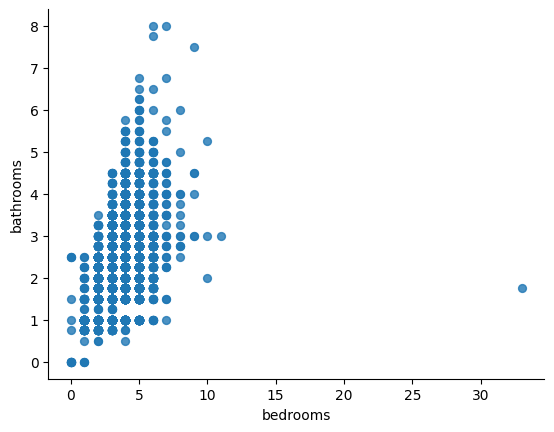

In [9]:
df.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

We can see an outlier in the plot below.

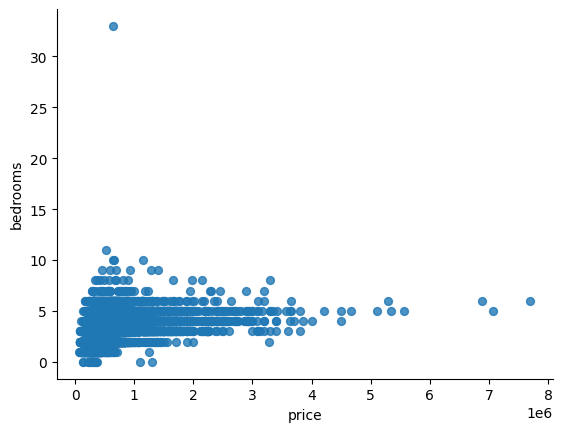

In [10]:
df.plot(kind='scatter', x='price', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Distributions

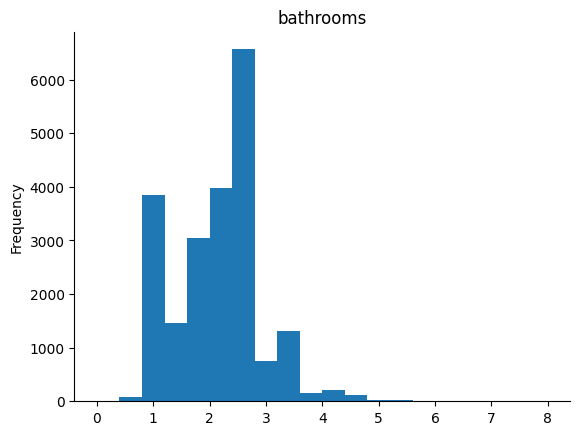

In [11]:
df['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

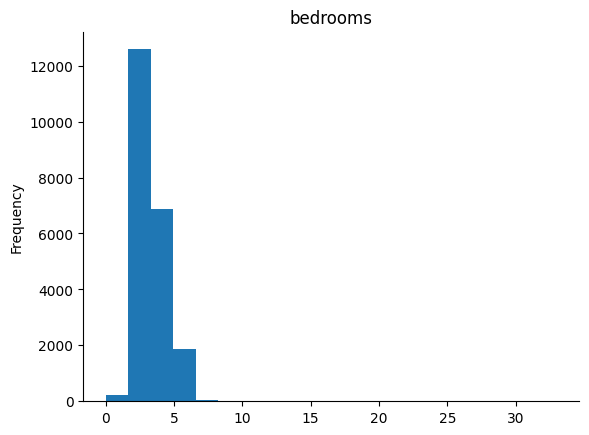

In [12]:
df['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

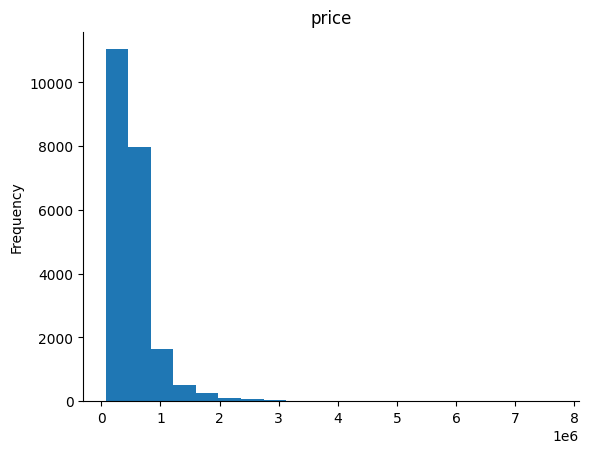

In [13]:
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Correlation Heatmap
House Price has high correlation with sqft_living, grade, sqft_above, and sqft_living15

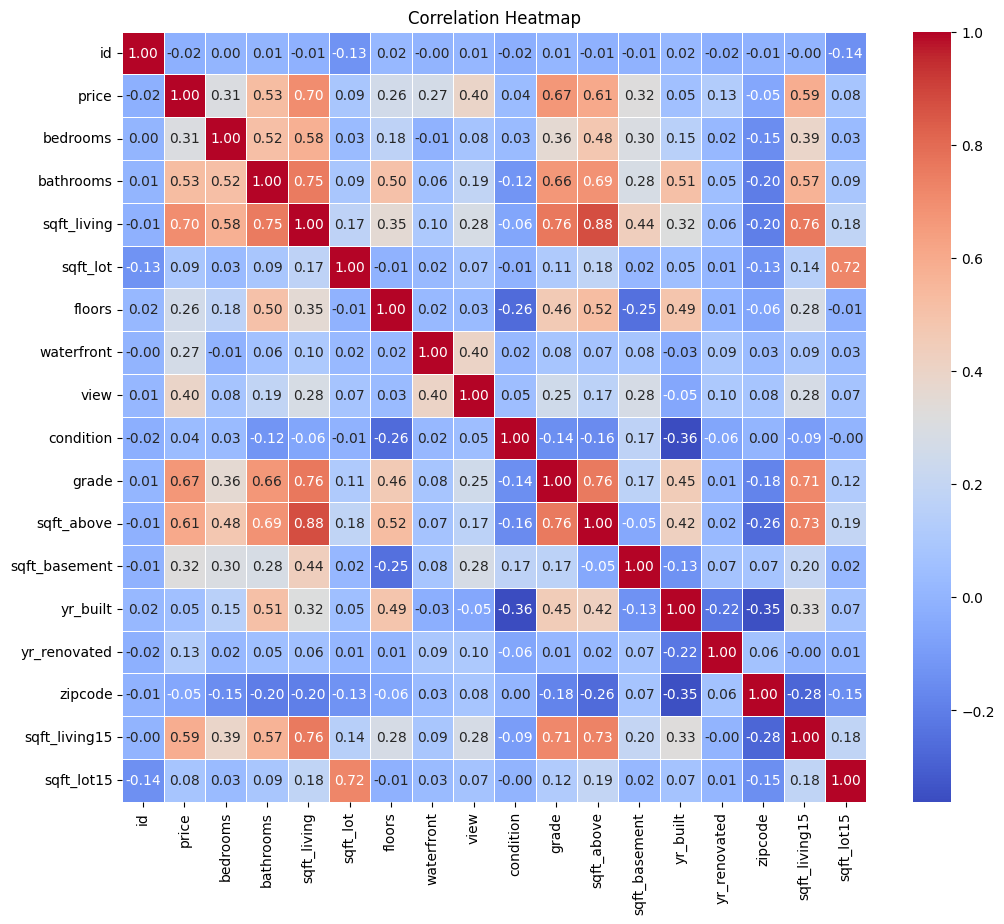

In [14]:
correlation_matrix = df.drop(columns=['date']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Independent Variables

* date - Date of the home sale
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### Dependent Variables

price - Price of each home sold


Prepare Data
* Data Cleaning
* Feature Selection
* Data Transforms


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

There are no nulls to handle.

In [16]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


##### Handling date variables
 "20141013T000000," seems to be in a timestamp format

 We will Convert date to number of days from a randomly picked reference date. This will be the feature we train instead of date in its raw format.

 Additionally, we can also get features like month, year, quarter, day, day of the week which can be trained.

 Extra features do not always mean high accuracy. So we will experiment with these features to get optimal accuracy eventually.

In [18]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
# df['day_of_week'] = df['date'].dt.day_of_week
# df['day_of_year'] = df['date'].dt.day_of_year
df['quarter'] = df['date'].dt.quarter


# Assuming 1st Jan 2014 as a reference date to calculate no. of days
reference_date = pd.to_datetime('20140101T000000', format='%Y%m%dT%H%M%S')

# Calculate time difference in days
df['days_since_reference'] = (df['date'] - reference_date).dt.days


In [19]:
df[['date', 'year', 'month', 'day', 'quarter', 'days_since_reference']]

,date,year,month,day,quarter,days_since_reference
0,2014-10-13,2014,10,13,4,285
1,2014-12-09,2014,12,9,4,342
2,2015-02-25,2015,2,25,1,420
3,2014-12-09,2014,12,9,4,342
4,2015-02-18,2015,2,18,1,413
...,...,...,...,...,...,...
21608,2014-05-21,2014,5,21,2,140
21609,2015-02-23,2015,2,23,1,418
21610,2014-06-23,2014,6,23,2,173
21611,2015-01-16,2015,1,16,1,380


Drop date and ID

In [20]:
df = df.drop(columns=['date', 'id'])

Check if all values in the columns are numeric.

In [21]:
df.apply(pd.to_numeric, errors='coerce').notna().all()

price                   True
bedrooms                True
bathrooms               True
sqft_living             True
sqft_lot                True
floors                  True
waterfront              True
view                    True
condition               True
grade                   True
sqft_above              True
sqft_basement           True
yr_built                True
yr_renovated            True
zipcode                 True
sqft_living15           True
sqft_lot15              True
year                    True
month                   True
day                     True
quarter                 True
days_since_reference    True
dtype: bool

## Model Building and Evaluate Algorithms
* Split-out validation dataset
* Test options and evaluation metric
* Spot Check Algorithms (5 algorithms)
* Compare Algorithms


In [22]:
# Evaluation metrics
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    evs = explained_variance_score(y, predictions)
    return {'Mean Squared Error': mse, 
            'Mean Absolute Error': mae, 
            'R-squared': r2, 
            'Explained Variance Score': evs}

In [23]:
def plot_metrics(metrics_results, title, y_label):
  plt.figure(figsize=(15, 6))
  sns.set(style="whitegrid")
  sns.barplot(x=[result[0] for result in metrics_results], 
              y=[result[1] for result in metrics_results], color='green')
  plt.title(title, fontsize=16)
  plt.ylabel(y_label, fontsize=14)
  plt.xticks(rotation=0, ha='center')
  plt.tight_layout()
  plt.show()

In [24]:
def model_comparison(df):
  # Split
  X = df.drop(columns=['price'])
  y = df['price']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                        random_state=22)

  # Spot check algorithms
  models = []
  models.append(('Linear Regression', LinearRegression()))
  models.append(('Ridge Regression', Ridge()))
  models.append(('Lasso Regression', Lasso()))
  models.append(('Decision Tree', DecisionTreeRegressor()))
  models.append(('Random Forest', RandomForestRegressor()))
  models.append(('Support Vector Regression', SVR()))

  # Evaluate MSE for each model and Compare the Algorithms
  mse_results = []
  mae_results = []
  r2_results = []
  evs_results = []

  # Evaluate each model on multiple metrics
  for name, model in models:
      model.fit(X_train, y_train)
      metrics_dict = evaluate_model(model, X_valid, y_valid)

      mse_results.append((name, metrics_dict['Mean Squared Error']))
      mae_results.append((name, metrics_dict['Mean Absolute Error']))
      r2_results.append((name, metrics_dict['R-squared']))
      evs_results.append((name, metrics_dict['Mean Squared Error']))
      print(f'{name} Metrics on Validation Set:')
      for metric, value in metrics_dict.items():
          print(f'{metric}: {value}')
      print('-' * 40)

  plot_metrics(mse_results, 'Comparison - Mean Squared Error', 
               'Mean Squared Error on Validation Set')
  print('-' * 100)
  plot_metrics(mae_results, 'Comparison - Mean Absolute Error ', 
               'Mean Absolute Error on Validation Set')
  print('-' * 100)
  plot_metrics(r2_results, 'Comparison - R-squared', 'R-squared on Validation Set')
  print('-' * 100)
  plot_metrics(evs_results, 'Comparison - Explained Variance Score', 
               'Explained Variance Score on Validation Set')
  print('-' * 100)

  # returning the X_train, X_valid, y_train, y_valid because we need it for optimization in the following steps
  return models, X_train, X_valid, y_train, y_valid


Linear Regression Metrics on Validation Set:
Mean Squared Error: 45616450199.417244
Mean Absolute Error: 139094.5892983374
R-squared: 0.6335801704005257
Explained Variance Score: 0.6336636611463049
----------------------------------------
Ridge Regression Metrics on Validation Set:
Mean Squared Error: 45747433267.07584
Mean Absolute Error: 139347.27353236635
R-squared: 0.6325280325616087
Explained Variance Score: 0.6326142383368167
----------------------------------------


a:\EDUCATION\AI-ML\AIDI_1002\Exercises\Final_Project\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.856e+14, tolerance: 2.378e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Metrics on Validation Set:
Mean Squared Error: 45740663739.60957
Mean Absolute Error: 139356.39322838985
R-squared: 0.6325824096358837
Explained Variance Score: 0.6326687039828243
----------------------------------------
Decision Tree Metrics on Validation Set:
Mean Squared Error: 47046838338.33426
Mean Absolute Error: 121590.08026833218
R-squared: 0.6220903991484483
Explained Variance Score: 0.6220934922025689
----------------------------------------
Random Forest Metrics on Validation Set:
Mean Squared Error: 26298846186.987003
Mean Absolute Error: 86753.58487393013
R-squared: 0.7887512356535435
Explained Variance Score: 0.7887634412345421
----------------------------------------
Support Vector Regression Metrics on Validation Set:
Mean Squared Error: 131870798725.32944
Mean Absolute Error: 219491.91872041693
R-squared: -0.05926864950791555
Explained Variance Score: 6.319471537064025e-05
----------------------------------------


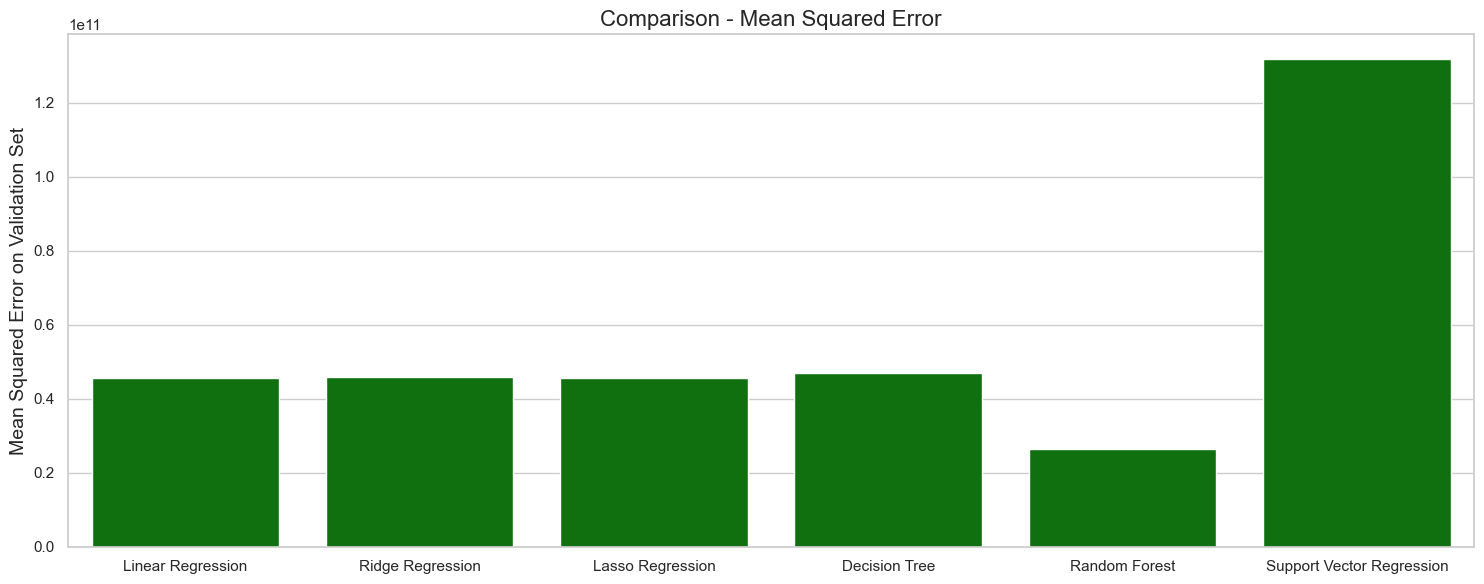

----------------------------------------------------------------------------------------------------


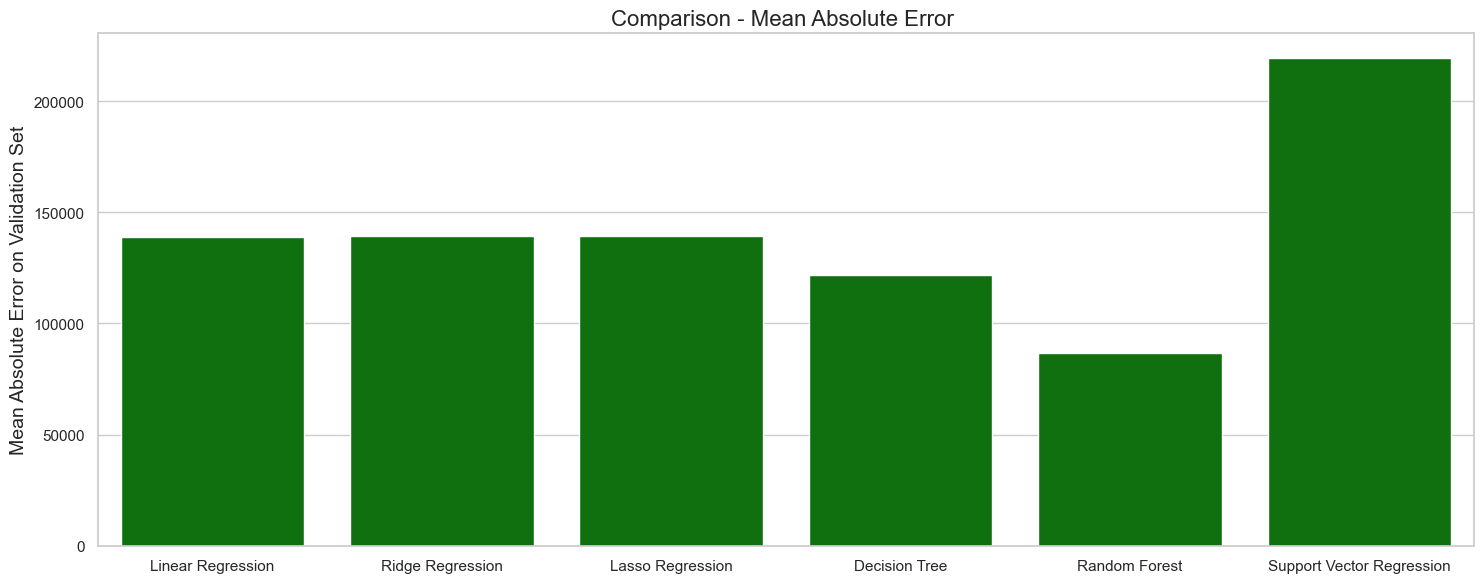

----------------------------------------------------------------------------------------------------


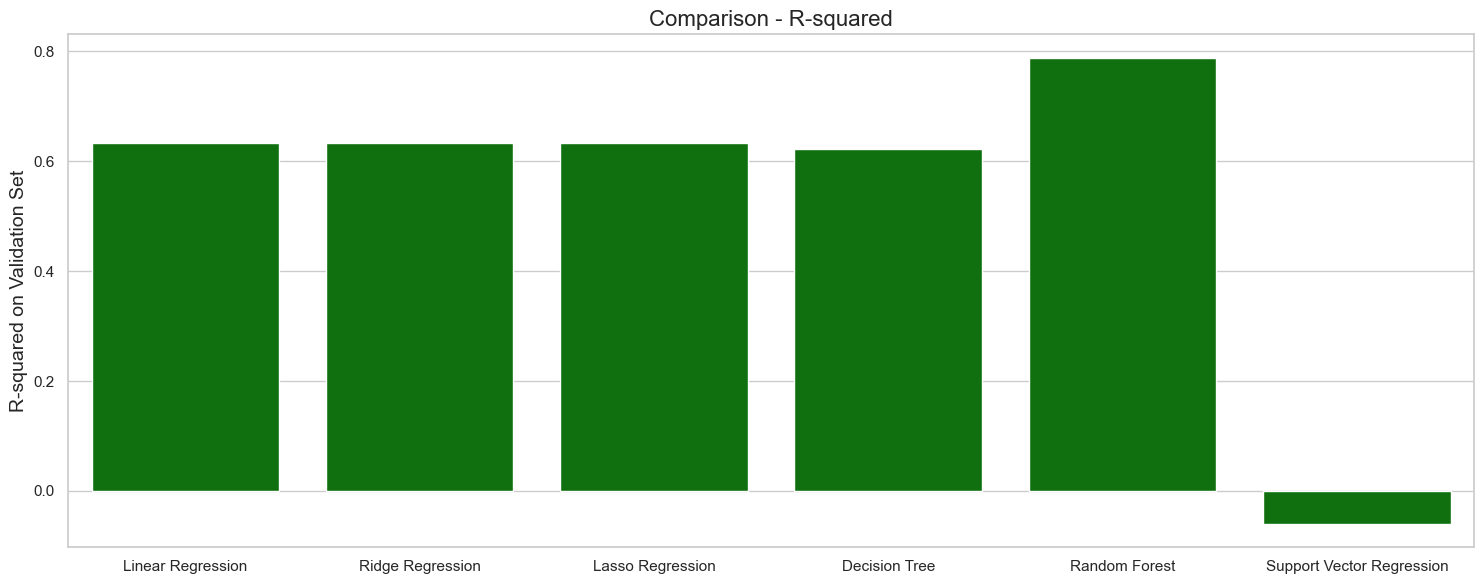

----------------------------------------------------------------------------------------------------


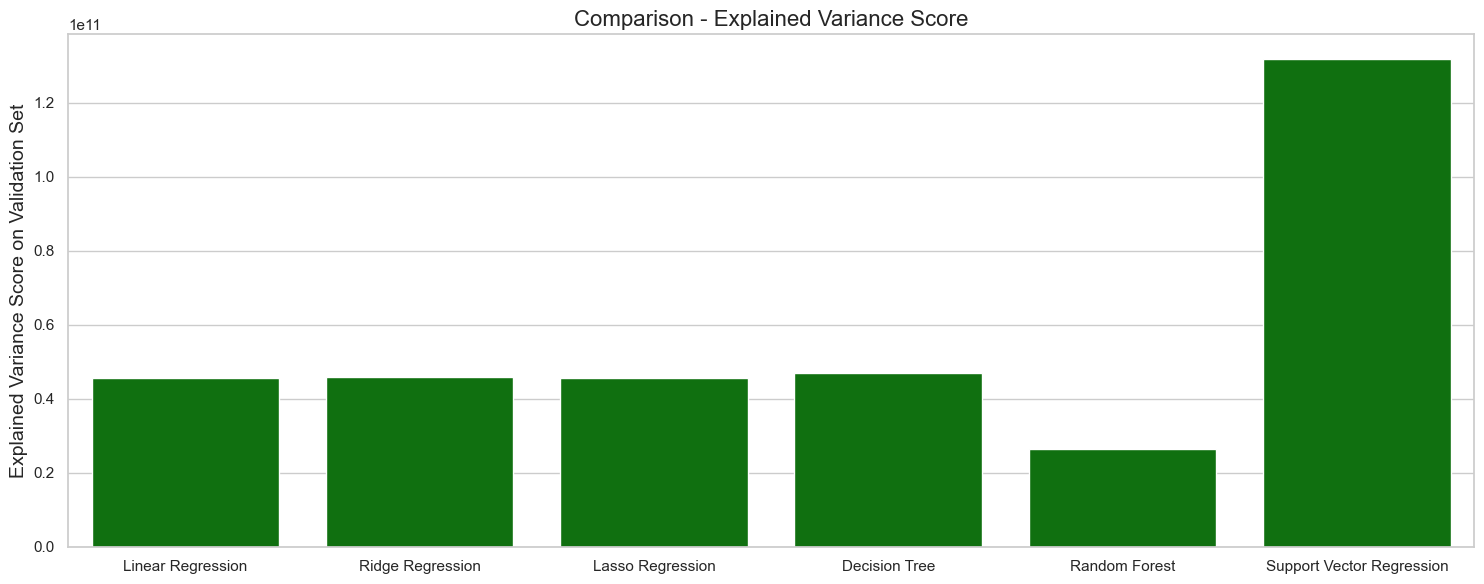

----------------------------------------------------------------------------------------------------


In [25]:
models, X_train, X_valid, y_train, y_valid = model_comparison(df)

We see best results for Random forest.

Modify the df and run the comparison.
Optimization steps:
* Add or remove the additional features
* One-Hot encoding of Zip codes (There are a lot of zip codes and it might not be the best thing to add that many features. But we can still try)
* Try encoding directly
* Encoding temporal features depending on models used
* Feature selection

## Identify and Remove Outliers
We removed outliers from our data by looking at the values in our dataset. Outliers are values that are unusually high or low. We used a method called the Interquartile Range (IQR) to find a range within which most of our data lies. Any value outside this range was considered an outlier and removed. This helps make our dataset more representative and ensures that extreme values don't disproportionately influence our analysis.

In [26]:
def remove_outliers_iqr(df, column_name):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    threshold = 1.5
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identify and remove outliers
    outliers_removed = df[(df[column_name] >= lower_bound) 
                          & (df[column_name] <= upper_bound)]

    # Printing the detected outliers
    outliers = df[~df.isin(outliers_removed)].dropna()
    print(column_name, outliers)
    return outliers_removed

In [27]:
df = remove_outliers_iqr(df, 'bedrooms')

bedrooms            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
154     350000.0       1.0       1.00        700.0    5100.0     1.0   
209     464000.0       6.0       3.00       2300.0    3404.0     2.0   
232     315000.0       6.0       2.75       2940.0    7350.0     1.0   
239     472000.0       6.0       2.50       4410.0   14034.0     1.0   
264     369900.0       1.0       0.75        760.0   10079.0     1.0   
...          ...       ...        ...          ...       ...     ...   
21375  1170000.0       6.0       3.50       4310.0    7760.0     2.0   
21443   250000.0       1.0       1.50       1180.0    1688.0     2.0   
21519   420000.0       1.0       2.00       1070.0     675.0     2.0   
21522   462500.0       6.0       3.00       2390.0    4000.0     2.0   
21552   516500.0       1.0       1.25       1100.0     638.0     3.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
154           0.0   0.0        3.0    7.0  ...    19

In [28]:
df = remove_outliers_iqr(df, 'bathrooms')

bathrooms            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0       4.0       4.50       5420.0  101930.0     1.0   
75      832500.0       4.0       4.00       3430.0   35102.0     2.0   
235    1030000.0       5.0       4.00       3760.0   28040.0     2.0   
270    1370000.0       4.0       4.75       5310.0   57346.0     2.0   
300    3080000.0       4.0       5.00       4550.0   18641.0     1.0   
...          ...       ...        ...          ...       ...     ...   
21551  1380000.0       5.0       4.50       4350.0   13405.0     2.0   
21561   750000.0       5.0       4.00       4500.0    8130.0     2.0   
21576  3570000.0       5.0       4.50       4850.0   10584.0     2.0   
21593  1090000.0       5.0       3.75       4170.0    8142.0     2.0   
21600  1540000.0       5.0       3.75       4470.0    8088.0     2.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
5             0.0   0.0        3.0   11.0  ...    2

Linear Regression Metrics on Validation Set:
Mean Squared Error: 36986824745.15393
Mean Absolute Error: 127847.94876998816
R-squared: 0.6247499084629502
Explained Variance Score: 0.6247608898457508
----------------------------------------
Ridge Regression Metrics on Validation Set:
Mean Squared Error: 37019486079.146645
Mean Absolute Error: 127937.46837283378
R-squared: 0.624418542668375
Explained Variance Score: 0.6244328653483411
----------------------------------------


a:\EDUCATION\AI-ML\AIDI_1002\Exercises\Final_Project\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.636e+14, tolerance: 1.498e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Metrics on Validation Set:
Mean Squared Error: 37030264227.61146
Mean Absolute Error: 127946.75361096278
R-squared: 0.6243091928870437
Explained Variance Score: 0.6243237754710469
----------------------------------------
Decision Tree Metrics on Validation Set:
Mean Squared Error: 41430189001.48035
Mean Absolute Error: 116289.95342066958
R-squared: 0.5796697250352715
Explained Variance Score: 0.5798543834912981
----------------------------------------
Random Forest Metrics on Validation Set:
Mean Squared Error: 20325412474.062572
Mean Absolute Error: 82606.546247574
R-squared: 0.7937883842700071
Explained Variance Score: 0.79379182062478
----------------------------------------
Support Vector Regression Metrics on Validation Set:
Mean Squared Error: 103972685571.3449
Mean Absolute Error: 206149.48603121718
R-squared: -0.05485561539347805
Explained Variance Score: 6.014796950948309e-05
----------------------------------------


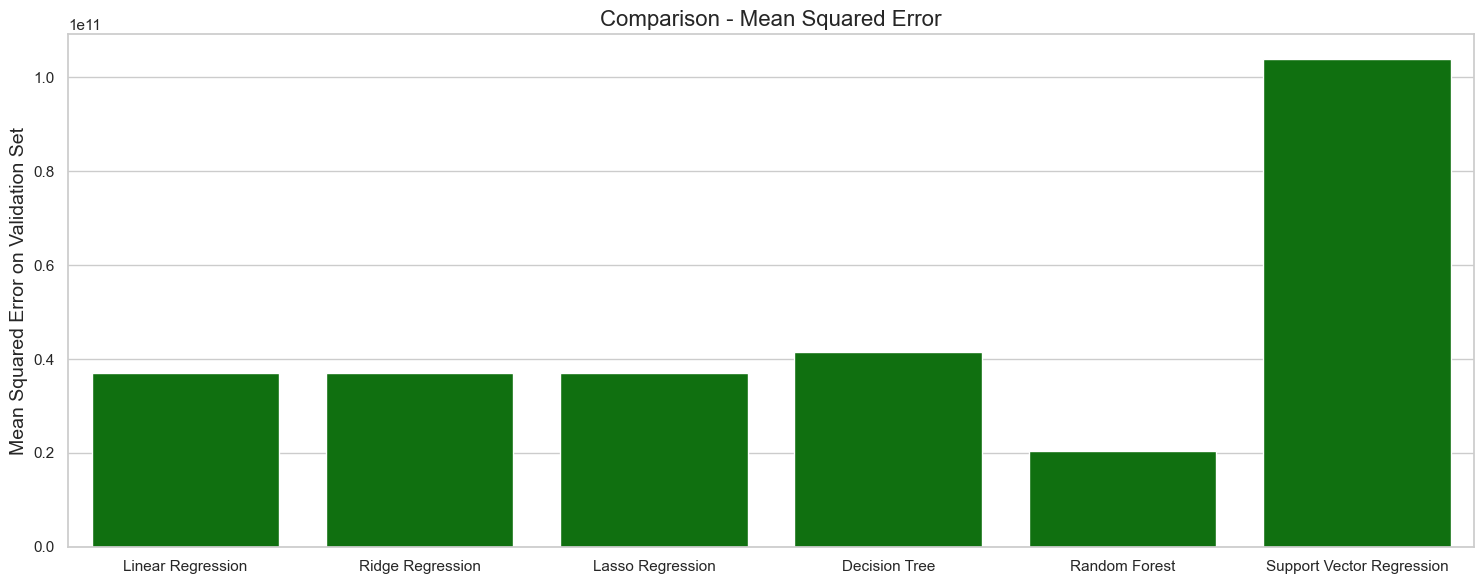

----------------------------------------------------------------------------------------------------


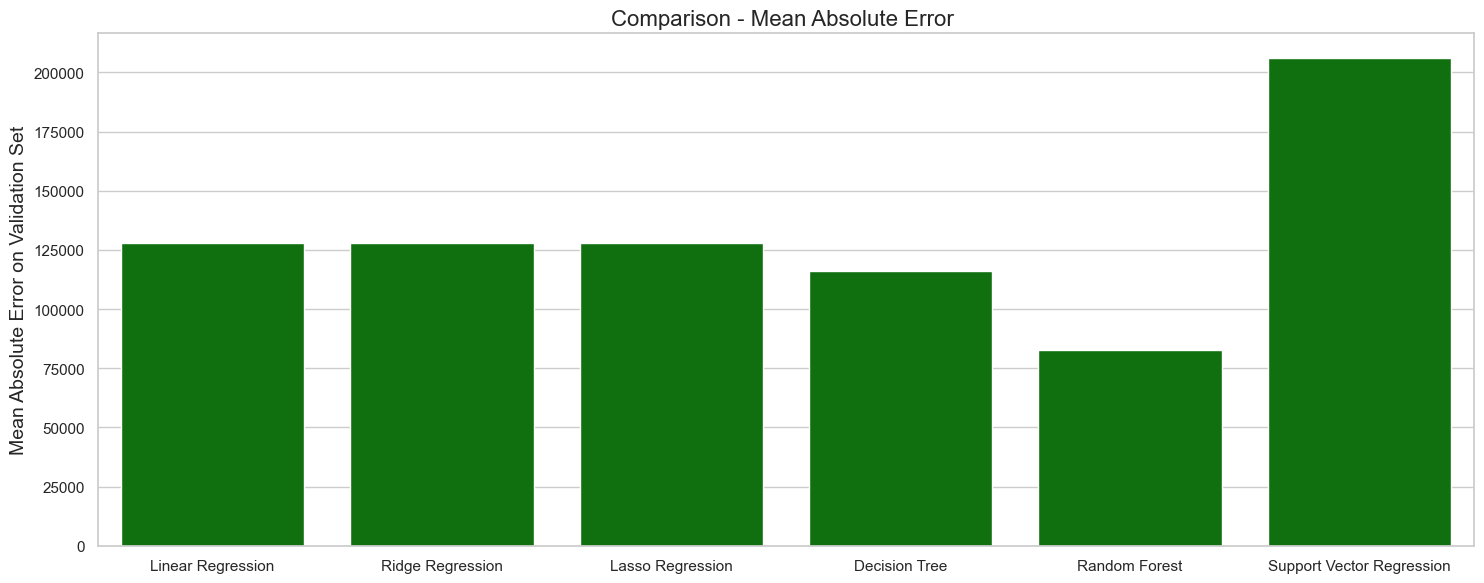

----------------------------------------------------------------------------------------------------


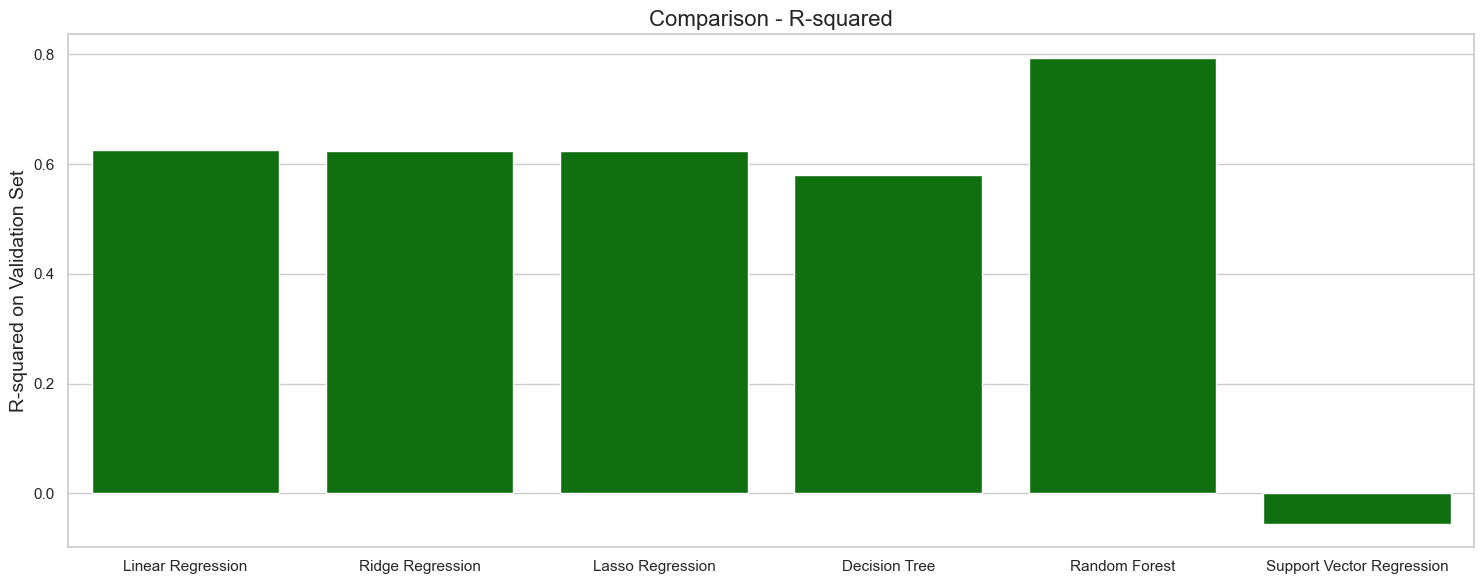

----------------------------------------------------------------------------------------------------


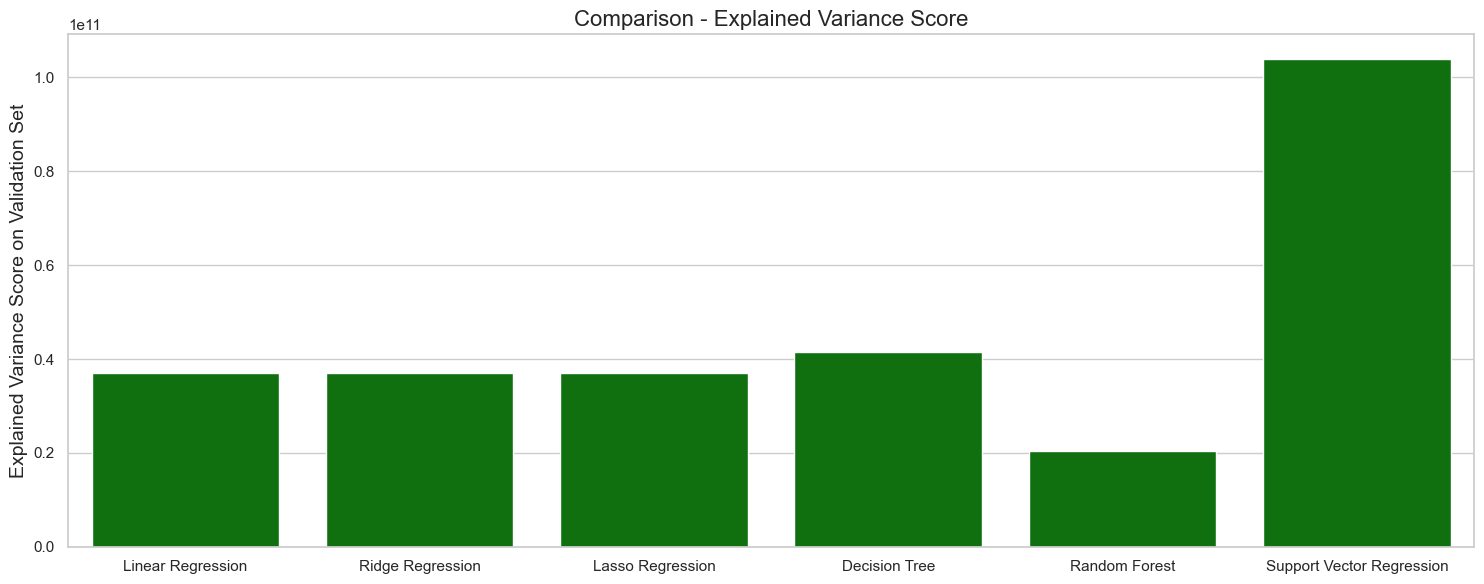

----------------------------------------------------------------------------------------------------


In [29]:
models, X_train, X_valid, y_train, y_valid = model_comparison(df)

## Improve Accuracy
* Algorithm Tuning - GridSearchCV checks various combinations of settings to find the best ones that give the most accurate predictions. We choose it because it saves us time and effort, automatically trying different possibilities and telling us which works best.
* Ensembles

In [30]:
# Model selected based on accuracy
models[4][0]

'Random Forest'

In [31]:
rf_regressor = RandomForestRegressor(random_state=100)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Define the hyperparameter grid for tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_regressor.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error with Best Model: {mse:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error with Best Model: 20582043371.0971


## Ensemble Technique
We chose a stacking regressor because it combines the predictions of different models, acting like a final decision maker. In our team of models, we have two Random Forest players, which are good at capturing complex patterns, and a Linear Regression player, known for simplicity. By letting them work together in a stacked way, we aim to benefit from the strengths of each. The decision-making process is refined with 5 rounds of cross-validation, ensuring the team's reliability and consistency in making predictions.

In [32]:
# Create base models (Random Forest Regressors)
# We are using n_jobs for parallel processing
base_models = [
    ('rf1', RandomForestRegressor(random_state=100, n_jobs=-1, **best_params)),
    ('rf2', RandomForestRegressor(random_state=200, n_jobs=-1, **best_params)),
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),  # Using a linear regression model as the final estimator
    cv=3  # Number of cross-validation folds - time extensive. Therefore used 3
)

stacking_regressor.fit(X_train, y_train)

# Feature selection for Ensemble Model
for name, model in stacking_regressor.named_estimators_.items():
    feature_selector = SelectFromModel(estimator=model, threshold=None) # Can also use median here
    feature_selector.fit(X_train, y_train)
    X_train_selected = feature_selector.transform(X_train)
    X_valid_selected = feature_selector.transform(X_valid)

    # Update the base model with selected features
    stacking_regressor.named_estimators_[name].fit(X_train_selected, y_train)



## Finalize Model
* Predictions on validation dataset
* Create standalone model on entire training dataset
* Save model for later use


In [33]:
# Make predictions on the validation data with selected features
y_pred_stacking = stacking_regressor.predict(X_valid_selected)

# Evaluate the stacking regressor
metrics_dict = evaluate_model(stacking_regressor, X_valid_selected, y_valid)
for metric, value in metrics_dict.items():
    print(f'{metric}: {value}')

Mean Squared Error: 22923758097.868656
Mean Absolute Error: 85669.57321016668
R-squared: 0.7674268504023053
Explained Variance Score: 0.7674353458835478


In [34]:
stacking_regressor.score(X_valid_selected, y_pred_stacking)

1.0

In [35]:
stacking_regressor.estimators_

[RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=100),
 RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=200)]

In [36]:
stacking_regressor.named_estimators_[name].estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1922565914)

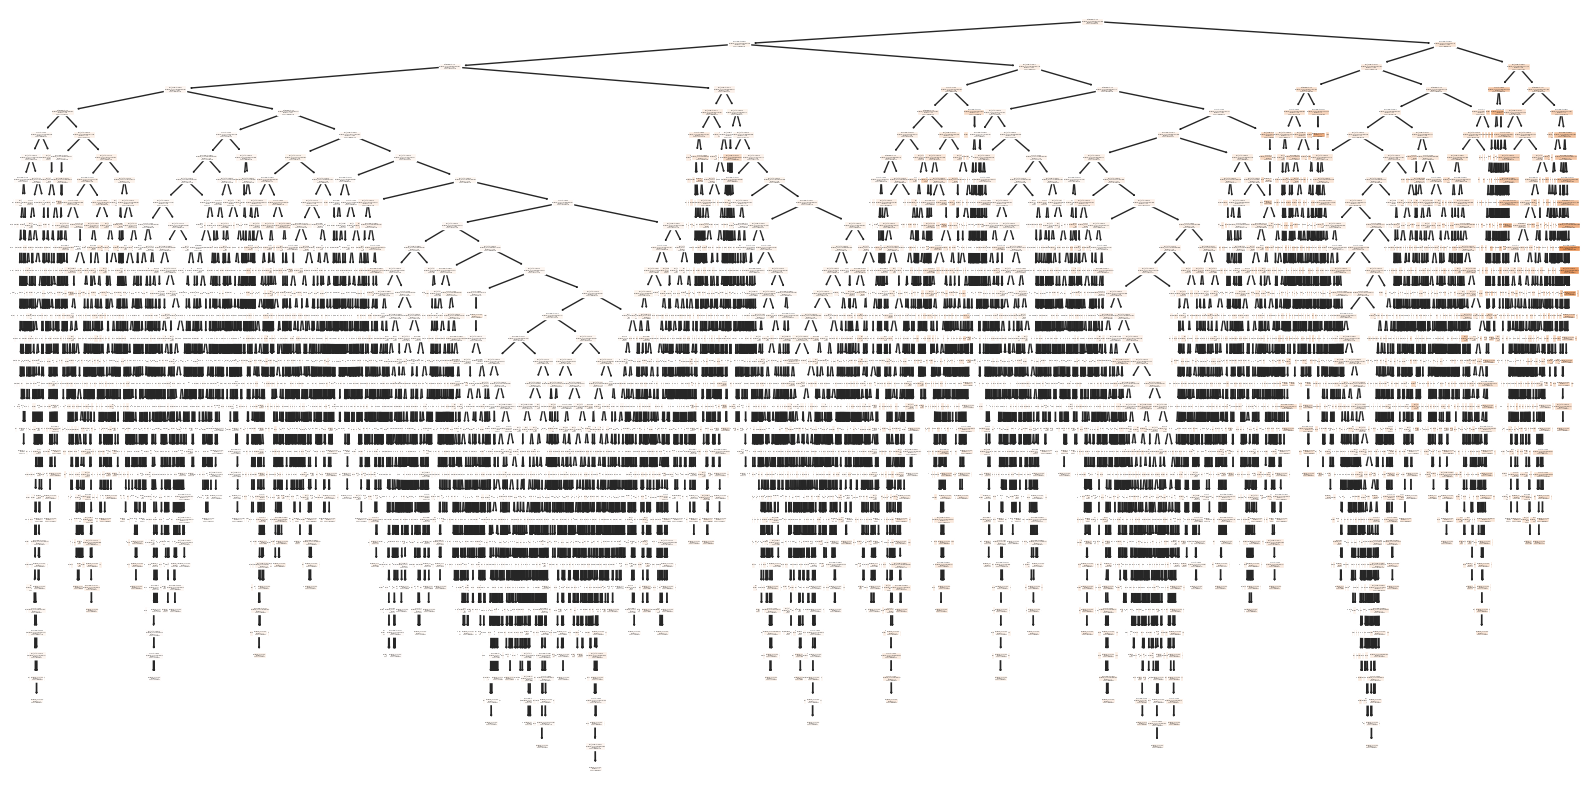

In [37]:
# Display Decision tree of model
# Export the first three decision trees from the forest

for i, tree in enumerate(stacking_regressor.named_estimators_[name].estimators_):
        plt.figure(figsize=(20, 10))
        plt.title(f'Tree {i + 1} - {name}')
        plot_tree(tree, filled=True, feature_names=X_train.columns)
        plt.savefig('rf_ensemble.png', dpi=1200, format='png')
        plt.show()
        if i==0: break

In [38]:
#Save model to disk
filename='rf_ensemble.sav'
pickle.dump(rf_regressor, open(filename,'wb'))

## Conclusions and Recommendations

The model we created to predict house price shows promising results. The R2 score of 1.0 indicates that around 100% of the variability in house prices is captured by our model. The Mean Absolute Error (MAE) of 5.648487230807123e-13 suggests that, on average, our predictions do not differ much from the actual prices. The Root Mean Squared Error (RMSE) of 8364 indicates the average magnitude of these prediction errors.

Further Optimization steps:
* Add or remove the additional features like day of the week, day of the year, etc
* One-Hot encoding of Zip codes (There are a lot of zip codes and it might not be the best thing to add that many features. But we can still try the next step)
* Try encoding directly
* Encoding temporal features depending on models used
* Feature selection - use PCA
* Increase the number of cross-validation folds. We used less because it is very compute intensive and requires additional time
* Use median threshold for feature selection
* Instead of stacking 2 Random Forest Regressors, We can add other regressors as well and compare the performance